Pois categories:
- entertainment
- commercial
- catering
- service
- office
- leisure
- natural
- education
- building.historic
- heritage
- tourism
- accomodation
- pet
- healthcare
- administrative
- production
- religion
- amenity
- public transport

Nodes features:
- crosswalk
- walk light
- round-about
- walk light duration
- street width
- tactile paving

Edges features:
- work in progress
- bike lane
- uphill
- surface
- one way
- tactile paving
- stairs

Pois features:
- wheelchair accessible
- tactile paving
- tactile map
- reception
- stairs
- elevators

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import json

In [2]:
src = "new_york"
out = f"{src}/{src}_out"

In [3]:
!python3.8 src/format.py --name "New York" --n0 0 --n1 "(3, 40.74605893499274, -73.99053528624474)" --d_feets 259.19 --feets_per_inch 60  --src_dir "{src}"

Feets per pixel: 2.0978965222031607
Could not find edge for Sushi Ginza Onodera
Could not find edge for Pig 'N' Whistle On 36th
Could not find edge for Calle Dao
Could not find edge for Wolfgang’s Steakhouse
Could not find edge for The Crooked Knife
Could not find edge for on
Could not find edge for Prosek
Could not find edge for Mondo
Could not find edge for Nomad
Could not find edge for Sweetgreen
Could not find edge for The Redbury New York
Barn Joo 35 is too close to Costas
Food Gallery 32 is too close to Gammeeok
Legends is too close to Naya
Szechuan Gourmet is too close to Windfall Lounge
The Harold is too close to West 32nd Street & Avenue of the Americas


In [4]:
def distance(p1, p2):
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

def get_label(name: str):
    name.replace("-", " ")
    name.replace("_", " ")

    label = ""
    for word in name.split(" "):
        if len(word) > 2 and word[:-2].isnumeric():
            label += word[:-2]
        else: label += word[0]
    return label

def get_contrasting_color(color):
    rgb = mcolors.to_rgb(color)
    brightness = 0.299 * rgb[0] + 0.587 * rgb[1] + 0.114 * rgb[2]
    return 'white' if brightness < 0.5 else 'black'

In [5]:
G = nx.Graph()

with open(f'{out}/nodes.json') as f:
    nodes = json.load(f)

for i, node in enumerate(nodes):
    G.add_node(i, pos=(node[0], node[1]))

with open(f'{out}/edges.json') as f:
    edges = json.load(f)

with open(f'{out}/streets.json', 'r') as f:
    streets = json.load(f)

for street, street_edges in streets.items():
    street = street.replace("Street", "St")
    street = street.replace("Avenue", "Ave")
    street = street.replace("Boulevard", "Blvd")
    street = street.replace("Road", "Rd")

    for edge_index in street_edges:
        edge = edges[edge_index]

        n1 = G.nodes[edge[0]]['pos']
        n2 = G.nodes[edge[1]]['pos']
        dist = distance(n1, n2)
        G.add_edge(edge[0], edge[1], weight=dist, street=street)

with open(f'{out}/pois.json') as f:
    pois = json.load(f)
    pois.sort(key=lambda x: get_label(x['name']))

print(f"PoIs found: {len(pois)}")

PoIs found: 76


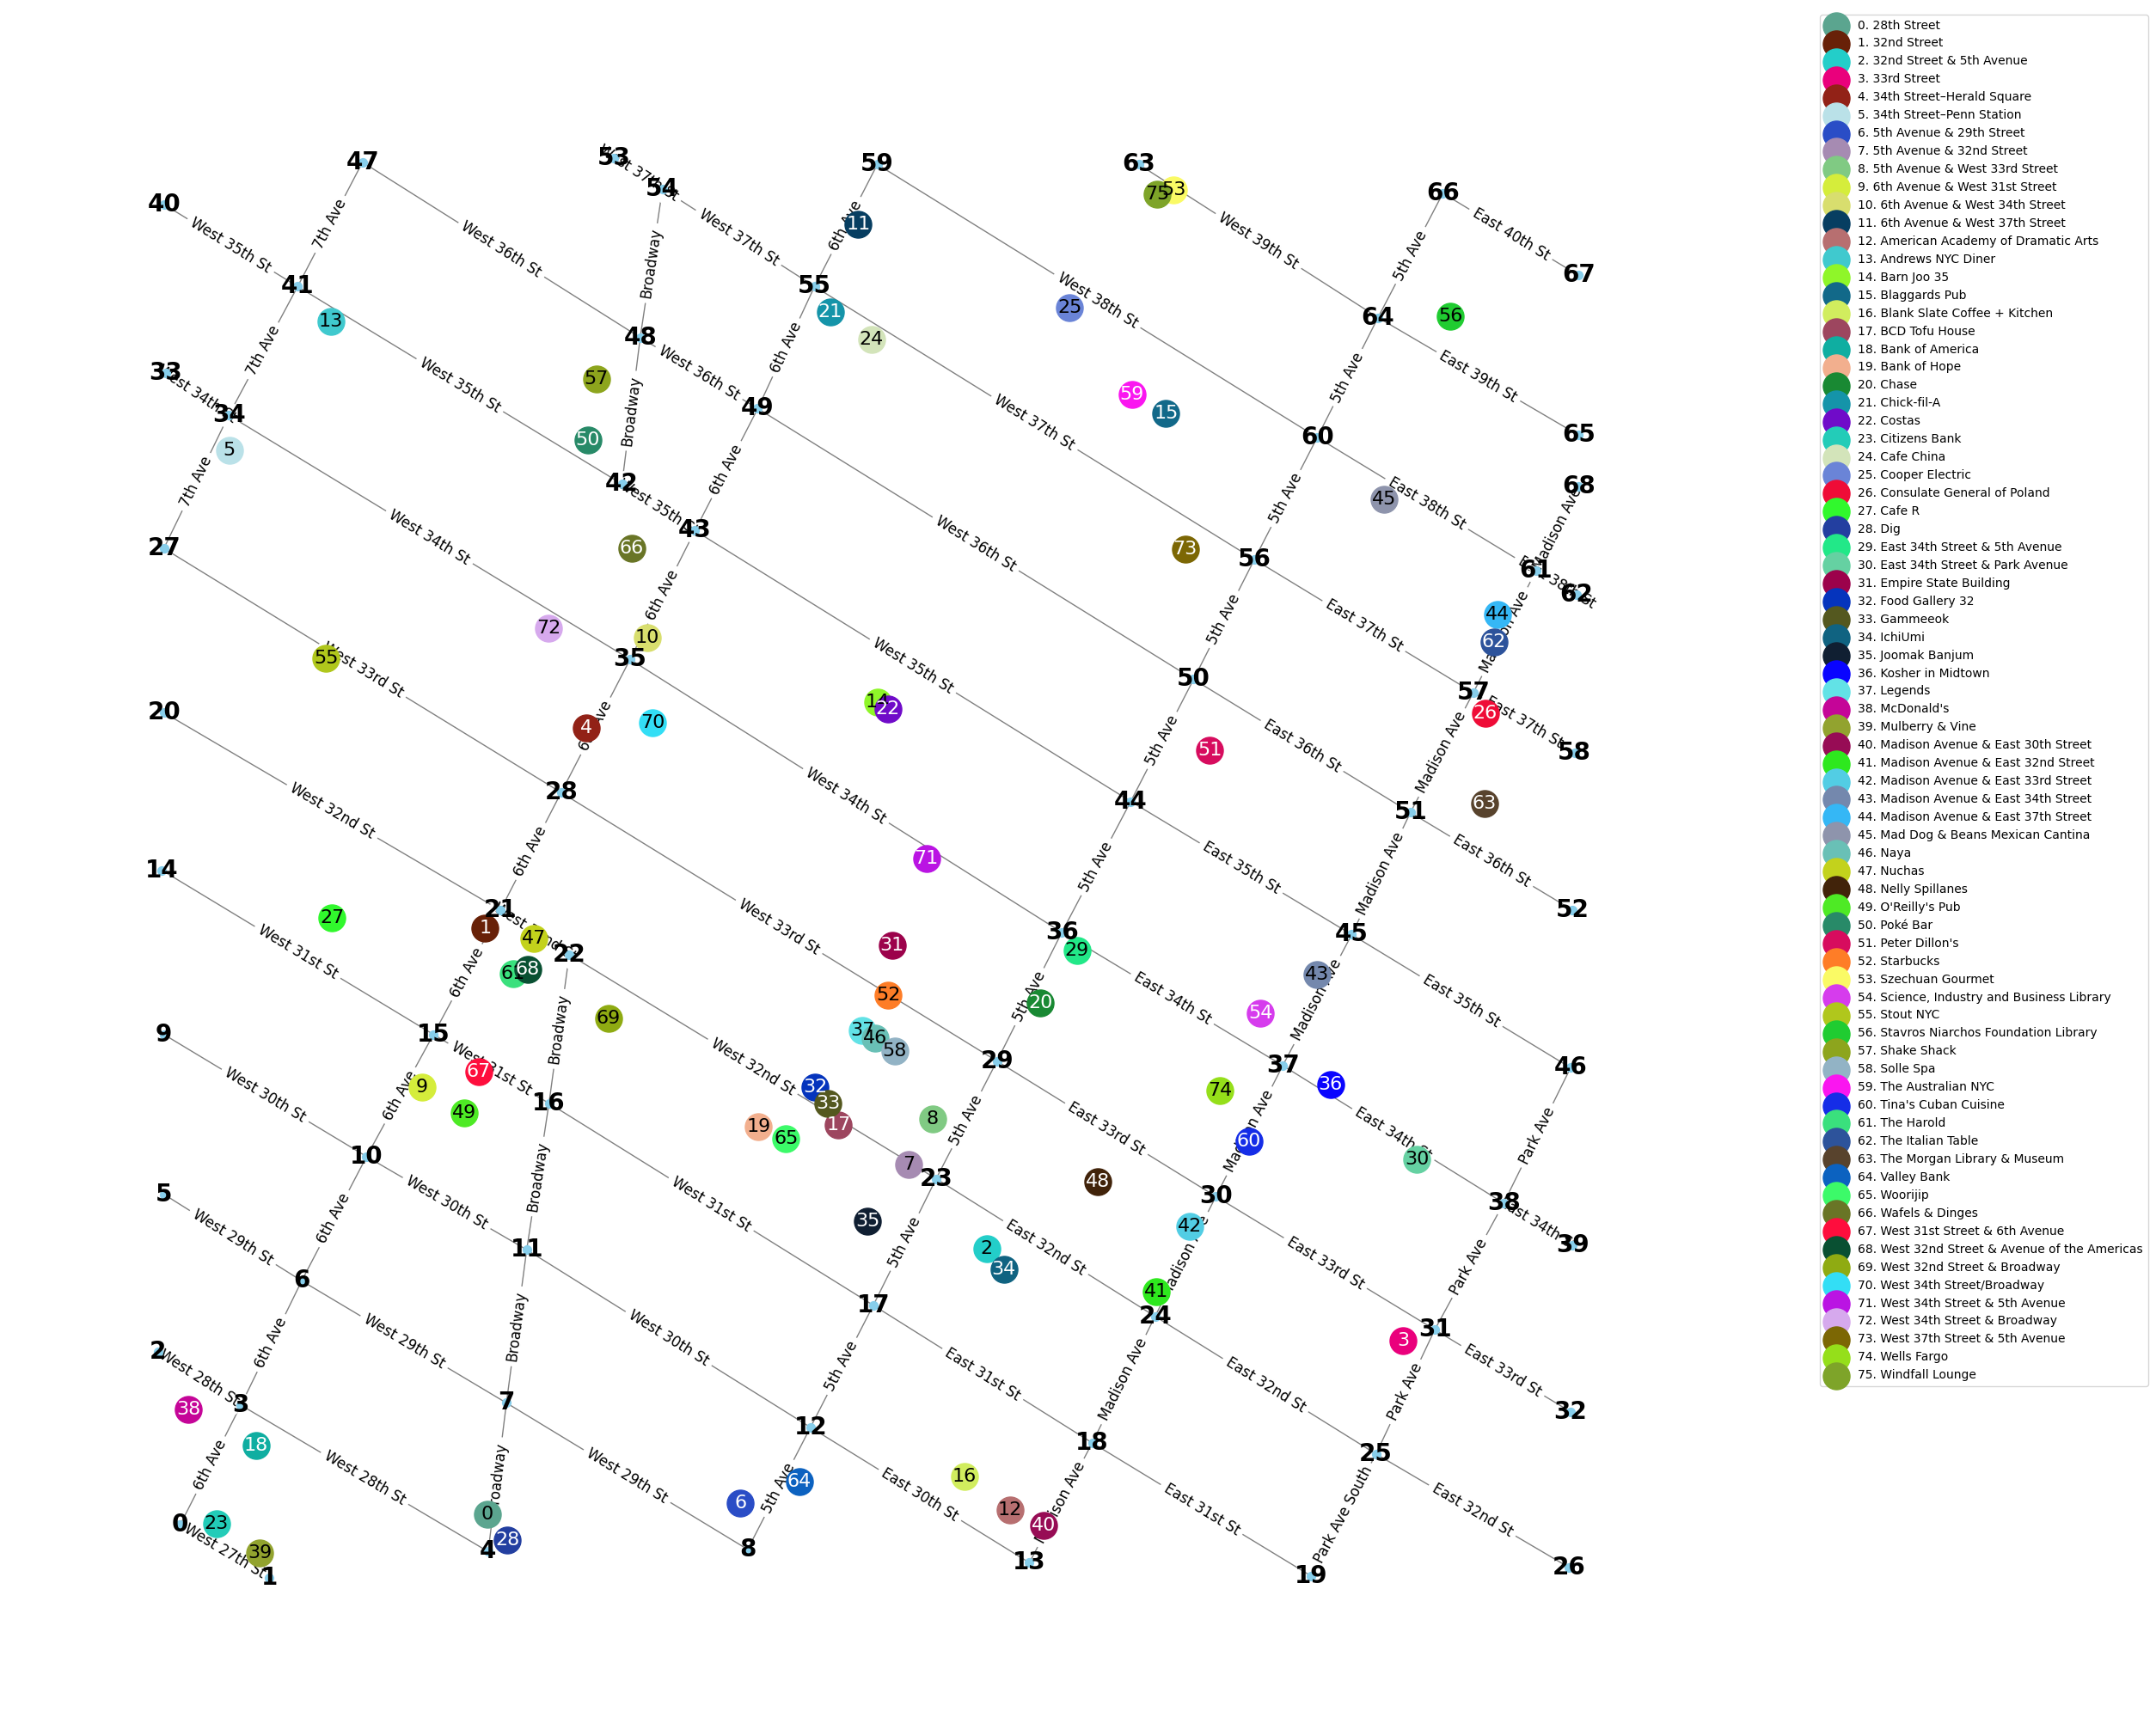

In [6]:
pos = nx.get_node_attributes(G, "pos")

plt.figure(figsize=(20, 20))

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=50,
    node_color="skyblue",
    font_size=20,
    font_color="black",
    font_weight="bold",
    edge_color="gray",
)

labels = nx.get_edge_attributes(G, "street")
#labels = {k: round(v, 2) for k, v in labels.items()}
#labels = {k: get_label(v) for k, v in labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)

colors = np.random.rand(len(pois), 3)
for i, poi in enumerate(pois):
    coords = poi["coords"]
    dot = plt.scatter(
        coords[0], coords[1], color=colors[i], s=500, label=f"{i}. {poi['name']}"
    )
    text_color = get_contrasting_color(colors[i])
    plt.text(coords[0], coords[1], i, fontsize=16, c=text_color, ha="center", va="center")

plt.gca().invert_yaxis()
plt.gcf().set_size_inches(20, 20)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.savefig(f"{out}/plot.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

In [7]:
offset = 0
for i, poi in enumerate(pois[offset:]):
    print(f"{i + offset}. {poi['name']} - {edges[poi['edge']]}")

0. 28th Street - [4, 7]
1. 32nd Street - [15, 21]
2. 32nd Street & 5th Avenue - [23, 24]
3. 33rd Street - [30, 31]
4. 34th Street–Herald Square - [28, 35]
5. 34th Street–Penn Station - [27, 34]
6. 5th Avenue & 29th Street - [8, 12]
7. 5th Avenue & 32nd Street - [22, 23]
8. 5th Avenue & West 33rd Street - [23, 29]
9. 6th Avenue & West 31st Street - [10, 15]
10. 6th Avenue & West 34th Street - [35, 43]
11. 6th Avenue & West 37th Street - [55, 59]
12. American Academy of Dramatic Arts - [13, 18]
13. Andrews NYC Diner - [34, 41]
14. Barn Joo 35 - [43, 44]
15. Blaggards Pub - [59, 60]
16. Blank Slate Coffee + Kitchen - [13, 18]
17. BCD Tofu House - [22, 23]
18. Bank of America - [0, 3]
19. Bank of Hope - [22, 23]
20. Chase - [29, 36]
21. Chick-fil-A - [49, 55]
22. Costas - [43, 44]
23. Citizens Bank - [0, 3]
24. Cafe China - [55, 56]
25. Cooper Electric - [59, 60]
26. Consulate General of Poland - [51, 57]
27. Cafe R - [14, 15]
28. Dig - [4, 7]
29. East 34th Street & 5th Avenue - [36, 37]
3